# **Unsupervised classification by K-Means clustering**


**K-Means** คือ วิธีการจัดกลุ่มรูปแบบหนึ่งใน Data mining ซึ่งอยู่ในกลุ่ม Unsupervised หน้าที่หลักของ K-means คือการแบ่งกลุ่มแบบ Clustering ซึ่งจะใช้พื้นฐานทางสถิติ ส่วนหน้าที่ของ Clustering คือ การจับกลุ่มของข้อมูลที่มีลักษณะใกล้เคียงกันเป็นกลุ่มเดียวกัน 

**วิธีการของ K-means**
1. กำหนดจำนวนกลุ่มขึ้นมาก่อน ซึ่งอย่างน้อยต้องมีตั้งแต่ 2 กลุ่มขึ้นไป เช่น  2 กลุ่ม หรือ K = 2 จากนั้นกำหนดตัวแปรให้กลุ่ม
2. ดูตำแหน่งของสมาชิกในกลุ่ม หากสมาชิกตัวใดอยู่ใกล้ตัวแปรไหนมากกว่า ให้จัดอยู่ในกลุ่มที่ใกล้
3. ปรับตำแหน่งของตัวแปรใหม่ให้อยู่ตรงกลางของกลุ่ม
4. ทำตามข้อ 2 และข้อ 3 จนกว่าตัวแปรของกลุ่มจะไม่เปลี่ยนตำแหน่ง

**ตัวอย่าง**

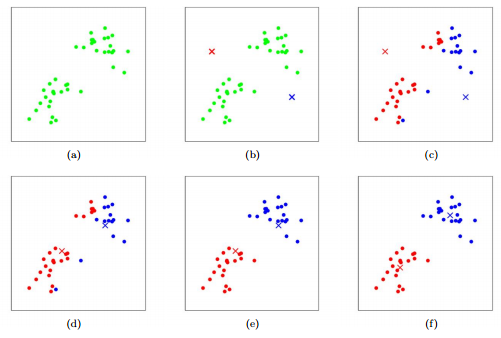


https://miro.medium.com/max/626/0*pG5mzzi_VIafIxMX.png

# **Flood area classification using the Unsupervised**

1. ติดตั้ง lib ผ่าน pip 

In [ ]:
!pip install gdal
!pip install rasterio
!pip install numpy
!pip install geopandas
!pip install pandas
!pip install shapely
!pip install fiona
!pip install matplotlib

     |████████████████████████████████| 19.1MB 50.1MB/s 
     |████████████████████████████████| 1.0MB 10.7MB/s 
     |████████████████████████████████| 14.8MB 345kB/s 
     |████████████████████████████████| 6.5MB 51.2MB/s 


2. การทำ Processing ด้วยวิธีการ K-Means clustering 

In [ ]:
# เรียกใช้งาน lib

import numpy as np
from sklearn import cluster
from osgeo import gdal, gdal_array

In [ ]:
# คำสั่งให้ GDAL ข้ามข้อยกเว้นของ Python และ Register ไดรเวอร์ทั้งหมด

gdal.UseExceptions()
gdal.AllRegister()

# อ่านข้อมูล Raster image และดูขนาดภาพ

img_ds = gdal.Open('/content/01_unsupervised/input_unsupervised/data-nrt-area.tif', gdal.GA_ReadOnly)
band = img_ds.GetRasterBand(1)
img = band.ReadAsArray()
print (img.shape)
X = img.reshape((-1,1))
print (X.shape)

# กำหนดจำนวนกลุ่มสำหรับใช้ในการ Unsupervised (จำนวนกลุ่มอย่างน้อย 2 กลุ่มหรือ 2 กลุ่มขึ้นไป)

n_clusters = 3
k_means = cluster.KMeans(n_clusters)
k_means.fit(X)

X_cluster = k_means.labels_
X_cluster = X_cluster.reshape(img.shape)

print (len(X_cluster))

(759, 779)
(591261, 1)
759


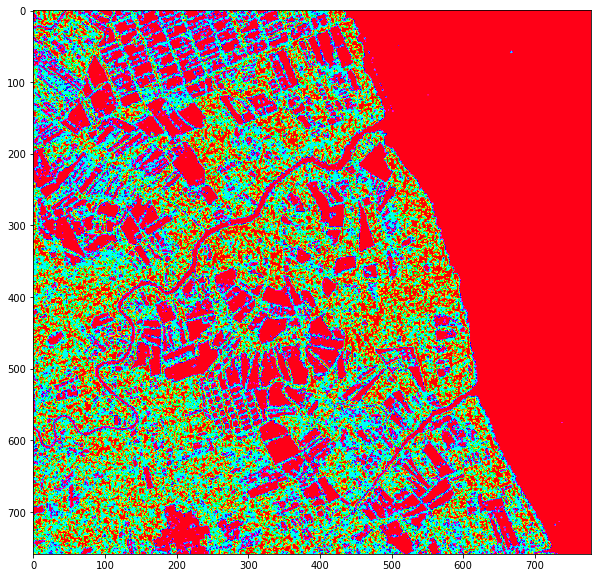

In [ ]:
# Plot ข้อมูล

import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.imshow(X_cluster, cmap="hsv")
plt.show()

3. Save Output โดยเขียนออกเป็นไฟล์ GeoTIFF

In [ ]:
# Save Product write out to tiff

from osgeo import gdal, gdal_array

ds = gdal.Open('/content/01_unsupervised/input_unsupervised/data-nrt-area.tif')
band = ds.GetRasterBand(1)
arr = band.ReadAsArray()
[cols, rows] = img.shape
aa = img.shape
print(aa)

format = "GTiff"
driver = gdal.GetDriverByName(format)

outDataRaster = driver.Create('/content/01_unsupervised/output_unsupervised/unclass-nrt-area.tif', rows, cols, 1, gdal.GDT_Byte)
outDataRaster.SetGeoTransform(ds.GetGeoTransform()) ## ตั้งค่า geotransform ให้เหมือนกับ input
outDataRaster.SetProjection(ds.GetProjection()) ## ตั้งค่า projection ให้เหมือนกับ input

outDataRaster.GetRasterBand(1).WriteArray(X_cluster)

outDataRaster.FlushCache() ## remove ออกจาก memory
del outDataRaster ## ลบข้อมูลที่ไม่ใช่ geotiff จริงๆ

(759, 779)


4. ทำการ Check ขนาดไฟล์ก่อนทำ K-Means Cluster, Unsupervised (กำหนดให้ข้อมูลที่จะวิเคราะห์ได้ต้องมีขนาดน้อยกว่า 10.00MB)

In [ ]:
import numpy as np
from sklearn import cluster
from osgeo import gdal, gdal_array
import os

file_size = os.path.getsize('/content/01_unsupervised/input_unsupervised/data-nrt-area.tif')
print(file_size/(1024*1024))

if file_size/(1024*1024) < 10.00:
    print("Processing")
    gdal.UseExceptions()
    gdal.AllRegister()

    #File Path 
    indata = '/content/01_unsupervised/input_unsupervised/data-nrt-area.tif'
    outdata = '/content/01_unsupervised/output_unsupervised/unclass-nrt-area.tif'

    # Read in raster image 
    img_ds = gdal.Open(indata, gdal.GA_ReadOnly)
    band = img_ds.GetRasterBand(1)
    img = band.ReadAsArray()
    print (img.shape)
    X = img.reshape((-1,1))
    print (X.shape)

    n_clusters=3
    k_means = cluster.KMeans(n_clusters)
    k_means.fit(X)
    X_cluster = k_means.labels_
    X_cluster = X_cluster.reshape(img.shape)
    print (len(X_cluster))

    #Save Product
    #write out to tiff

    ds = gdal.Open(indata)
    band = ds.GetRasterBand(1)
    arr = band.ReadAsArray()
    [cols, rows] = img.shape
    aa = img.shape
    print(aa)

    format = "GTiff"
    driver = gdal.GetDriverByName(format)
    outDataRaster = driver.Create(outdata, rows, cols, 1, gdal.GDT_Byte)
    outDataRaster.SetGeoTransform(ds.GetGeoTransform())
    outDataRaster.SetProjection(ds.GetProjection())
    outDataRaster.GetRasterBand(1).WriteArray(X_cluster)
    outDataRaster.FlushCache()
    del outDataRaster

else:
  print("File Over 10Mb")

2.258026123046875
Processing
(759, 779)
(591261, 1)
759
(759, 779)


5. เปรียบเทียบความต่างข้อมูลก่อนและหลังการทำ Unsupervised classification 

Input Data


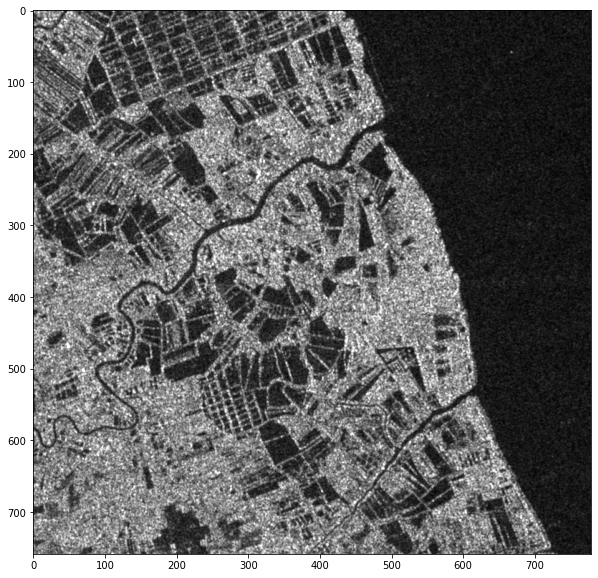

Output Cluster


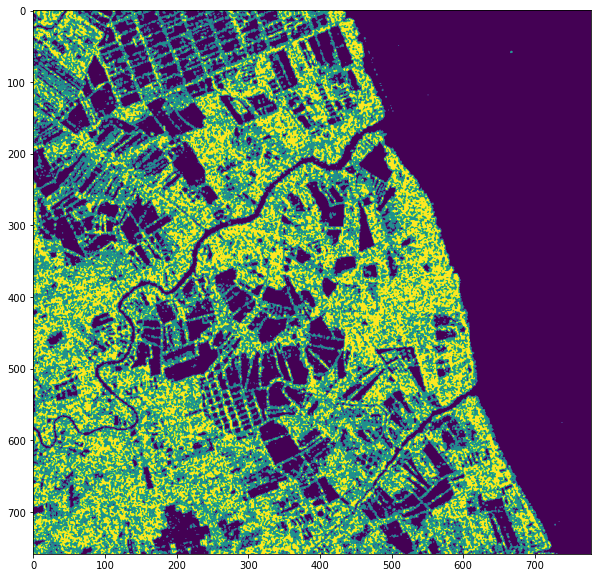

(1, 759, 779)

In [ ]:
import rasterio
from rasterio import plot
from rasterio.mask import mask

print("Input Data")
indatanrt = '/content/01_unsupervised/input_unsupervised/data-nrt-area.tif'
raster = rasterio.open(indatanrt)
arr = raster.read()
plt.figure(figsize=(10,10))
plot.show(rasterio.plot.adjust_band(arr))
arr.shape

print("Output Cluster")
outdatanrt = '/content/01_unsupervised/output_unsupervised/unclass-nrt-area.tif'
raster = rasterio.open(outdatanrt)
arr = raster.read()
plt.figure(figsize=(10,10))
plot.show(rasterio.plot.adjust_band(arr))
arr.shape

6. การเลือกเฉพาะกลุ่มข้อมูลที่เป็นตัวแทนของน้ำ


*   ขั้นตอนนี้จะใช้ QGIS เข้ามาช่วย โดยจะ Install QGIS ใน Google Colab

In [ ]:
# ทำการติดตั้ง QGIS ใน Google Colab

import time
start = time.time()
!apt-get install gnupg software-properties-common
!wget -qO - https://qgis.org/downloads/qgis-2020.gpg.key | sudo gpg --no-default-keyring --keyring gnupg-ring:/etc/apt/trusted.gpg.d/qgis-archive.gpg --import
!sudo chmod a+r /etc/apt/trusted.gpg.d/qgis-archive.gpg
!add-apt-repository "deb https://qgis.org/debian-nightly-release/ `lsb_release -c -s` main"
!apt-get update
!apt-get install opencl-headers ocl-icd-opencl-dev 
!apt-get install qgis python3-qgis qgis-plugin-grass
!python -m pip install rasterio gdal
!python -m pip install geopandas
end = time.time()
print(f"Total setup time {end - start:.2f} s")

In [ ]:
import sys
import os

import qgis
from qgis.gui import *
from qgis.core import *
from qgis.utils import plugins
from PyQt5.QtCore import *
from qgis.analysis import QgsNativeAlgorithms

sys.path.append('/usr/share/qgis/python/plugins/')
sys.path.append('/usr/share/qgis/python/')

In [ ]:
# Testing

# ยกเลิก comment เพื่อตรวจสอบโฟลเดอร์การประมวลผล
!ls -lh /usr/share/qgis/python/plugins/processing

# นำเข้า library ของไดรฟ์และต่อเชื่อม Google Drive ให้เป็นไดรฟ์ภายใน VM
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

In [ ]:
import sys
import os

import qgis
from qgis.gui import *
from qgis.core import *
from qgis.utils import plugins
from PyQt5.QtCore import *
from qgis.analysis import QgsNativeAlgorithms

sys.path.append('/usr/share/qgis/python/plugins/')
sys.path.append('/usr/share/qgis/python/')

In [ ]:
# environment setup
!export PYTHONPATH="/usr/share/qgis/python"
!export LD_LIBRARY_PATH="/usr/lib/qgis"
!export QGIS_PREFIX="/usr"

In [ ]:
import sys
sys.path.append('/usr/share/qgis/python/plugins/')
sys.path.append('/usr/share/qgis/python/')

import processing
from processing.core.Processing import Processing
Processing.initialize()
QgsApplication.processingRegistry().addProvider(QgsNativeAlgorithms())

# ตรวจสอบ algorithms การประมวลผล QGIS ที่มีอยู่
for alg in QgsApplication.processingRegistry().algorithms():
        print(alg.id(), "--->", alg.displayName())

7. ขั้นตอนการ Processing โดยใช้ QGIS

In [ ]:
# นำโค้ดรันใน python console ใน QGIS

# Set Filepath
indata = "/content/01_unsupervised/output_unsupervised/unclass-nrt-area.tif"
outdata = "/content/01_unsupervised/processing_flooding/unclass-nrt-area.geojson"
outfix = "/content/01_unsupervised/processing_flooding/unclass-nrt-area-fix.geojson"
wp = "/content/01_unsupervised/processing_flooding/wp-nrt.gpkg"
out_intersect = "/content/01_unsupervised/processing_flooding/intersectwater-nrt-area.geojson.geojson"

# ขั้นตอน Raster To Polygon by polygonize => เปลี่ยนข้อมูล Raster เป็นข้อมูล Polygon
processing.run("gdal:polygonize",\
{'INPUT':indata,\
'BAND':1,\
'FIELD':'DN',\
'EIGHT_CONNECTEDNESS':False,\
'EXTRA':'',\
'OUTPUT':outdata})

# ขั้นตอน Fix Geometries => แก้ไข Shapefiles ที่ไม่ถูกต้องจาก Raster
processing.run("native:fixgeometries", {'INPUT':outdata,'OUTPUT':outfix})

# ขั้นตอน Extract By Location => ใช้การ Intersect ด้วยจุดตัวแทนของพื้นที่น้ำเพื่อหา Class DN ของพื้นที่น้ำ
processing.run("native:extractbylocation", {'INPUT':outfix,'PREDICATE':[0],'INTERSECT':wp,'OUTPUT':out_intersect})

8. การหาพื้นที่น้ำท่วม

*   เก็บค่า DN ที่ Intersect ได้จากกลุ่มตัวอย่างให้เป็น Array
*   คำนวณหาจำนวน DN ที่มีค่ามากที่สุด โดยกำหนดให้ DN นั้นต้องมีมากกว่า 75% จึงจะเป็นค่า DN ที่เป็นตัวแทนของพื้นที่น้ำ
*   ทำการ Expression ค่าที่เป็นพื้นที่น้ำออกเป็น Output



In [ ]:
out_intersect = "/content/01_unsupervised/processing_flooding/intersectwater-nrt-area.geojson.geojson"
outflood = "/content/01_unsupervised/processing_flooding/flooding-nrt.geojson"

layer = QgsVectorLayer(out_intersect,'','ogr')
z = []      #Array z ให้เก็บค่า DN ที่ Intersect ได้จากกลุ่มตัวอย่าง
fn = layer.featureCount()

for i in range (0,fn):      #อ่านค่า DN ทั้งหมดในชั้นข้อมูล out_intersect
    feat = layer.getFeature(i)
    z.append(feat['DN'])        #คำสั่งเก็บค่า DN ที่ Intersect เข้า Array z 
    print(feat['DN'])

print(z)        #ดูค่าที่อยู่ใน Array z 

#DN is Water Body
from collections import Counter

def waterDN(class_list):        #class_list เป็น Dict
	count_class = Counter(class_list)       #count_class เป็นตัวแปรที่ใช้นับจำนวนของตัวเลขว่ามีเท่าไหร่โดยใช้ Counter ในลิสต์ของ class_list {"a":5,"b":10,"c":20}
	output75per = False         # กำหนดตัวแปรให้ output75per = False
	for class_w in count_class:     # ให้ class_w เป็นตัวแทนของ DN สำหรับการคำนวณหาค่า DN ที่มีค่ามากกว่า 75% โดยจะ loop class_w ใน count_class ไปเรื่อยๆ จนกว่าจะเจอ Class DN ที่มีค่ามากกว่า 75%
		# print("key ",i,"=",a[i])
		print("class ",class_w,"count = ",count_class[class_w] ,"percent = ",(count_class[class_w]*100)/len(z)," %")

		if (count_class[class_w]*100)/len(z) > 75:      #ถ้าเจอ  Class DN ที่มีค่าน้อยกว่า 75% ก็จะกลับไป loop ใน class_w ใน count_class ใหม่
		  output75per=class_w       #ถ้า class_w มากกว่า 75 % แล้วก็ให้ผ่านไปได้
	if output75per != False:        # ถ้า output75per ไม่เท่ากับ False แล้ว ก็ให้รีเทิร์น output75per
	  return str(output75per)
	else:                           #ถ้ายังเท่ากับก็จะยังไม่ให้ผ่าน
	  return False

watwer = waterDN(z)        #Function waterDN ถูกเรียกใช้ผ่านตัวแปร watwer โดยจะไปเรียกค่าใน Array z
if watwer != False:     #ถ้า watwer ไม่เท่ากับ False หรือเจอค่าที่มากกว่า 75% แล้ว ก็จะเข้าการ EXPRESSION ค่าที่เป็นน้ำ
  print("Class :", watwer)
  processing.run("native:extractbyexpression", {'INPUT':outfix,'EXPRESSION':'\"DN\" = '+str(watwer),'OUTPUT':outflood})
else:
  print("< 75% Error")

*   หรือสามารถทำในโปรแกรม QGIS ได้โดยใช้โค้ดตั้งแต่ "ข้อ 7 และ ข้อ 8" ไปรันใน python console ใน QGIS

In [ ]:
#Set Filepath
indata = r"D:\Unsuper-kmean\unclass-nrt-area.tif"
outdata = r"D:\Unsuper-kmean\unclass-nrt-area.geojson"
outfix = r"D:\Unsuper-kmean\unclass-nrt-area-fix.geojson"
wp = r"D:\Unsuper-kmean\wp-nrt.gpkg"
out_intersect = r"D:\Unsuper-kmean\intersectwater-nrt-area.geojson"
outflood = r"D:\Unsuper-kmean\flooding-nrt.geojson"

# ขั้นตอน Raster To Polygon by polygonize => เปลี่ยนข้อมูล Raster เป็นข้อมูล Polygon
processing.run("gdal:polygonize",\
{'INPUT':indata,\
'BAND':1,\
'FIELD':'DN',\
'EIGHT_CONNECTEDNESS':False,\
'EXTRA':'',\
'OUTPUT':outdata})

# ขั้นตอน Fix Geometries => แก้ไข Shapefiles ที่ไม่ถูกต้องจาก Raster
processing.run("native:fixgeometries", {'INPUT':outdata,'OUTPUT':outfix})

# ขั้นตอน Extract By Location => ใช้การ Intersect ด้วยจุดตัวแทนของพื้นที่น้ำเพื่อหา Class DN ของพื้นที่น้ำ
processing.run("native:extractbylocation", {'INPUT':outfix,'PREDICATE':[0],'INTERSECT':wp,'OUTPUT':out_intersect})

layer = QgsVectorLayer(out_intersect,'','ogr')
z = []      #Array z ให้เก็บค่า DN ที่ Intersect ได้จากกลุ่มตัวอย่าง
fn = layer.featureCount()

for i in range (0,fn):      #อ่านค่า DN ทั้งหมดในชั้นข้อมูล intersect_water
    feat = layer.getFeature(i)
    z.append(feat['DN'])        #คำสั่งเก็บค่า DN ที่ Intersect เข้า Array z 
    print(feat['DN'])

print(z)        #ดูค่าที่อยู่ใน Array z 

#DN is Water Body
from collections import Counter

def waterDN(class_list):        #class_list เป็น Dict
	count_class = Counter(class_list)       #count_class เป็นตัวแปรที่ใช้นับจำนวนของตัวเลขว่ามีเท่าไหร่โดยใช้ Counter ในลิสต์ของ class_list {"a":5,"b":10,"c":20}
	output75per = False         # กำหนดตัวแปรให้ output75per = False
	for class_w in count_class:     # ให้ class_w เป็นตัวแทนของ DN สำหรับการคำนวณหาค่า DN ที่มีค่ามากกว่า 75% โดยจะ loop class_w ใน count_class ไปเรื่อยๆ จนกว่าจะเจอ Class DN ที่มีค่ามากกว่า 75%
		# print("key ",i,"=",a[i])
		print("class ",class_w,"count = ",count_class[class_w] ,"percent = ",(count_class[class_w]*100)/len(z)," %")

		if (count_class[class_w]*100)/len(z) > 75:      #ถ้าเจอ  Class DN ที่มีค่าน้อยกว่า 75% ก็จะกลับไป loop ใน class_w ใน count_class ใหม่
		  output75per=class_w       #ถ้า class_w มากกว่า 75 % แล้วก็ให้ผ่านไปได้
	if output75per != False:        # ถ้า output75per ไม่เท่ากับ False แล้ว ก็ให้รีเทิร์น output75per
	  return str(output75per)
	else:                           #ถ้ายังเท่ากับก็จะยังไม่ให้ผ่าน
	  return False

watwer = waterDN(z)        #Function waterDN ถูกเรียกใช้ผ่านตัวแปร watwer โดยจะไปเรียกค่าใน Array z
if watwer != False:     #ถ้า watwer ไม่เท่ากับ False หรือเจอค่าที่มากกว่า 75% แล้ว ก็จะเข้าการ EXPRESSION ค่าที่เป็นน้ำ
  print("Class :", watwer)
  processing.run("native:extractbyexpression", {'INPUT':outfix,'EXPRESSION':'\"DN\" = '+str(watwer),'OUTPUT':outflood})
else:
  print("< 75% Error")

# **Performing supervised classification on Satellite image**

1. ติดตั้ง lib ผ่าน pip 

In [ ]:
!pip install sklearn
!pip install geopandas
!pip install pandas
!pip install rasterstats
!pip install os
!pip install numpy
!pip install rasterio

     |████████████████████████████████| 133kB 9.2MB/s 
ERROR: Could not find a version that satisfies the requirement os (from versions: none)
ERROR: No matching distribution found for os


2. เรียกใช้งาน lib

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import geopandas as gpd
import pandas as pd
from rasterstats import zonal_stats
import os
import numpy as np
import rasterio

3. การทำ Supervised Classification

*   ในการ Processing ต้องมีข้อมูล Training ที่เป็นตัวแทนของ Class ต่างๆ และแทน Class นั้นๆ ด้วยตัวเลข แทนกลุ่มตัวอย่างด้วยเลขต่อไปนี้
  *   1 = water
  *   2 = forest
  *   3 = urban
  *   4 = agriculture
*   ใช้ข้อมูล Blue, Green, Red and Infrared Bands เรียงตามลำดับ ดังนี้
  *   Landsat 5 = Band1, Band2, Band3 and Band4
  *   Landsat 7 = Band1, Band2, Band3 and Band4
  *   Landsat 8 = Band2, Band3, Band4 and Band5
  *   Sentinel 2A = Band2, Band3, Band4 and Band8







In [ ]:
# Set file path
pointfile = "/content/02_supervised/class_ex.geojson"
s2folder = "/content/02_supervised/after_flood"
outfile = "/content/02_supervised/Classed_image.tif"

# สร้าง geodataframe ของจุดกลุ่มตัวอย่าง
df = gpd.read_file(pointfile) 

# คำนวณหา Statistic ของข้อมูล Raster ด้วยจุดกลุ่มตัวอย่าง
for root, folders, files in os.walk(s2folder):
    for file in files:
        f = os.path.join(root, file)
        if os.path.isfile(f) and f.endswith('.TIF'): #ใช้ข้อมูล blue, green, red and infrared bands
            # print(file)
            stats = ['max'] 
            df2 = pd.DataFrame(zonal_stats(vectors=df['geometry'], raster=f, stats=stats))
            df2.columns=['{0}_{1}'.format(stat, file.split('.')[0]) for stat in stats]
            df = df.join(df2)

df.columns.tolist() 
#['fid','classid','geometry','max_LT05_20111116_B1','max_LT05_20111116_B5','max_LT05_20111116_B2','max_LT05_20111116_B4','max_LT05_20111116_B3']
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]
# print(len(train))
# print(len(test))

predictor_cols = ['max_LT05_20111116_B1','max_LT05_20111116_B2','max_LT05_20111116_B3','max_LT05_20111116_B4']
X = train[predictor_cols].values.tolist() #List of lists: [64.0, 33.0, 41.0, 43.0] #X เป็นข้อมูลสถิติ/ทำนาย
y = train['classid'].tolist() #y[:5]: [1, 1, 1, 1, 1] #y เป็น classes
# print(X)
# print(y)
clf = make_pipeline(StandardScaler(),
                    LinearSVC(random_state=0, tol=1e-3)) #I have no idea what parameters to use, just copied from some example  :)
clf.fit(X,y)

# ตรวจสอบความแม่นยำ 
Xtest = test[predictor_cols]
ytest = test['classid']
p = clf.predict(Xtest)
clf.score(Xtest,ytest) # ex. 80%

# Class ข้อมูล Raster ทั้งหมดโดยใช้โมเดล จะอ่านข้อมูลเป็นอาร์เรย์ numpy และปรับเป็น columns (blue, green, red and infrared)
b1 = rasterio.open(os.path.join(s2folder, 'LT05_20111116_B1.TIF')).read()
b1 = b1[0,:,:]
b2 = rasterio.open(os.path.join(s2folder, 'LT05_20111116_B2.TIF')).read()
b2 = b2[0,:,:]
b3 = rasterio.open(os.path.join(s2folder, 'LT05_20111116_B3.TIF')).read()
b3 = b3[0,:,:]
b4 = rasterio.open(os.path.join(s2folder, 'LT05_20111116_B4.TIF')).read()
b4 = b4[0,:,:]
bands = np.dstack((b1,b2,b3,b4))
bands = bands.reshape(int(np.prod(bands.shape)/4),4)

r = clf.predict(bands) #ทำนายโดยใช้โมเดลและข้อมูล bands จากดาวเทียม
r = r.reshape(b1.shape) #เปลี่ยนเป็นอาร์เรย์ numpy แบบ 2D

#Write out to Tiff file.
b2src = rasterio.open(os.path.join(s2folder, 'LT05_20111116_B1.TIF'))
with rasterio.Env():
    profile = b2src.profile
    profile.update(
        dtype=rasterio.uint8,
        count=1,
        compress='lzw')
    with rasterio.open(outfile, 'w', **profile) as dst:
        dst.write(r.astype(rasterio.uint8), 1)

# **Land Cover Change Analysis with Python and GDAL**

1. ติดตั้ง library ผ่าน pip

In [ ]:
!pip install numpy
!pip install matplotlib
!pip install osgeo

2. เรียกใช้งาน library

In [ ]:
from osgeo import ogr, gdal, osr
import numpy as np
import os
import matplotlib.pyplot as plt

3. วิเคราะห์การเปลี่ยนแปลงสิ่งปกคลุมที่ดิน

In [ ]:
# Set file path

# Set Path ข้อมูลหลังน้ำท่วม
pathAfter_B4="/content/03_landcover/after_flood/after_flood_b4nir.TIF"
pathAfter_B3="/content/03_landcover/after_flood/after_flood_b3red.TIF"

# Set Path ข้อมูลก่อนน้ำท่วม
pathBefore_B4="/content/03_landcover/before_flood/before_flood_b4nir.TIF"
pathBefore_B3="/content/03_landcover/before_flood/before_flood_b3red.TIF"

# Output Files

# Output NDVI Rasters 
path_NDVI_After = "/content/03_landcover/output_landcover/NDVIAfter.TIF"
path_NDVI_Before = "/content/03_landcover/output_landcover/NDVIBefore.TIF"
path_NDVIChange = '/content/03_landcover/output_landcover/NDVIChange.tif'


# NDVI Contours
contours_NDVIChange = "/content/03_landcover/output_landcover/contours_NDVIChange.shp"

In [ ]:
# Open raster bands

B4_After = gdal.Open(pathBefore_B4)
B3_After = gdal.Open(pathBefore_B3)

B4_Before = gdal.Open(pathAfter_B4)
B3_Before = gdal.Open(pathAfter_B3)

# Read bands as matrix arrays

B4After_Data = B4_After.GetRasterBand(1).ReadAsArray().astype(np.float32)
B3After_Data = B3_After.GetRasterBand(1).ReadAsArray().astype(np.float32)

B4Before_Data = B4_Before.GetRasterBand(1).ReadAsArray().astype(np.float32)
B3Before_Data = B3_Before.GetRasterBand(1).ReadAsArray().astype(np.float32)

# เปรียบเทียบขนาด matrix  และระบบพิกัดของ parameters

print(B4_Before.GetProjection()[:80])
print(B4_After.GetProjection()[:80])
if B4_Before.GetProjection()[:80]==B4_After.GetProjection()[:80]: 
  print('SRC OK')
else:
  print('SRC Not equal')

print(B4_Before.GetGeoTransform())
print(B4_After.GetGeoTransform())
if B4_Before.GetGeoTransform()==B4_After.GetGeoTransform(): 
  print('Geotransformation OK')
else:
  print('Geotransformation Not equal')

# print(B4_Before.shape)
# print(B4_After.shape)
# if B4_Before.shape==B4_After.shape:
#   print('Array Size OK')
# else:
#   print('Array Size Not equal')

# รับ parameters จาก geotransformation 

geotransform = B4_Before.GetGeoTransform()

originX,pixelWidth,empty,finalY,empty2,pixelHeight=geotransform
cols =  B4_Before.RasterXSize
rows =  B4_Before.RasterYSize

projection = B4_Before.GetProjection()

finalX = originX + pixelWidth * cols
originY = finalY + pixelHeight * rows

PROJCS["WGS 84 / UTM zone 47N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84
PROJCS["WGS 84 / UTM zone 47N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84
SRC OK
(558165.0, 30.0, 0.0, 1918815.0, 0.0, -30.0)
(558165.0, 30.0, 0.0, 1918815.0, 0.0, -30.0)
Geotransformation OK


In [ ]:
# คำนวณ NDVI

ndviBefore = np.divide(B4Before_Data - B3Before_Data, B4Before_Data + B3Before_Data,where=(B4Before_Data - B3Before_Data)!=0)
ndviBefore[ndviBefore == 0] = -999

ndviAfter = np.divide(B4After_Data - B3After_Data, B4After_Data + B3After_Data,where=(B4After_Data - B3After_Data)!=0)
ndviAfter[ndviAfter == 0] = -999

def saveRaster(dataset,datasetPath,cols,rows,projection):
    rasterSet = gdal.GetDriverByName('GTiff').Create(datasetPath, cols, rows,1,gdal.GDT_Float32)
    rasterSet.SetProjection(projection)
    rasterSet.SetGeoTransform(geotransform)
    rasterSet.GetRasterBand(1).WriteArray(dataset)
    rasterSet.GetRasterBand(1).SetNoDataValue(-999)
    rasterSet = None

saveRaster(ndviBefore,path_NDVI_Before,cols,rows,projection)

saveRaster(ndviAfter,path_NDVI_After,cols,rows,projection)

NDVI Before Flood


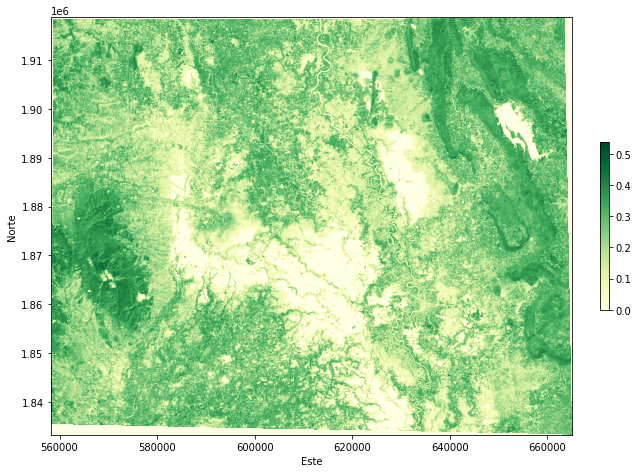

NDVI After Flood


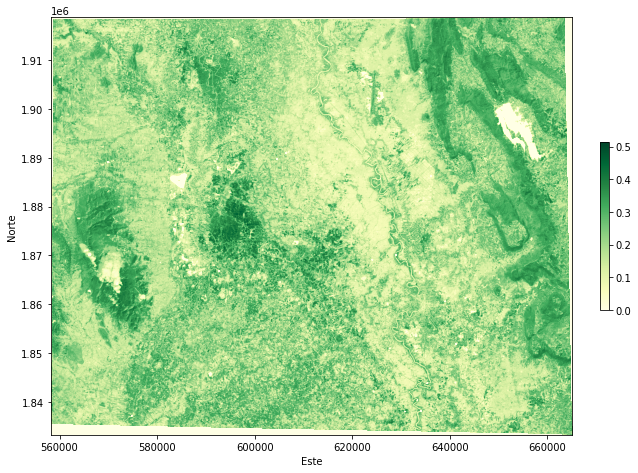

In [ ]:
#Plot NDVI Images

extentArray = [originX,finalX,originY,finalY]
def plotNDVI(ndviImage,extentArray,vmin,cmap):
    ndvi = gdal.Open(ndviImage)
    ds2011 = ndvi.ReadAsArray()
    plt.figure(figsize=(10,10))
    im = plt.imshow(ds2011, vmin=vmin, cmap=cmap, extent=extentArray)
    plt.colorbar(im, fraction=0.015)
    plt.xlabel('Este')
    plt.ylabel('Norte')
    plt.show()

print("NDVI Before Flood")
plotNDVI(path_NDVI_Before,extentArray,0,'YlGn')

print("NDVI After Flood")
plotNDVI(path_NDVI_After,extentArray,0,'YlGn')

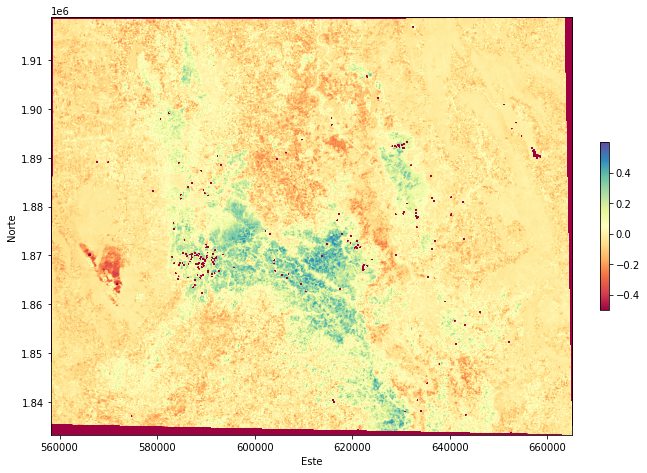

In [ ]:
#สร้างข้อมูล image ของ land cover ที่เปลี่ยนแปลง

ndviChange = ndviAfter- ndviBefore
ndviChange = np.where((ndviBefore>-999) & (ndviAfter>-999),ndviChange,-999)
ndviChange

saveRaster(ndviChange,path_NDVIChange,cols,rows,projection)

plotNDVI(path_NDVIChange,extentArray,-0.5,'Spectral')

# สร้างข้อมูล Contourlines

Dataset_ndvi = gdal.Open(path_NDVIChange)
ndvi_raster = Dataset_ndvi.GetRasterBand(1)

ogr_ds = ogr.GetDriverByName("ESRI Shapefile").CreateDataSource(contours_NDVIChange)

prj=Dataset_ndvi.GetProjectionRef() # GetProjection()

srs = osr.SpatialReference(wkt=prj)

contour_shp = ogr_ds.CreateLayer('contour', srs)
field_defn = ogr.FieldDefn("ID", ogr.OFTInteger)
contour_shp.CreateField(field_defn)
field_defn = ogr.FieldDefn("ndviChange", ogr.OFTReal)
contour_shp.CreateField(field_defn)

# Generate Contourlines
gdal.ContourGenerate(ndvi_raster, 0.1, 0, [], 1, -999, contour_shp, 0, 1)
ogr_ds = None